# House Price Prediction in King County


## Business Understanding


### Problem Statement

As a junior data scientist in a real estate company in King county that helps homeowners to sell and buy houses,my first project was to determine 

and analyse the  factors affecting the house prices and further build a pricing algorithm for the houses based on the factors.The goal is to help 

the agency advice homeowners on the factors that might increase the estimated value of their homes and by what amount.

### Objectives

* Which factors affect house prices?

* Which house atributes increase sale price?

* What is the average cost of a house?



## Data Understanding

### Loading the data


In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.stats.api as sms
import scipy.stats as stats
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate,ShuffleSplit
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
#Loading data
Houses = pd.read_csv("/home/elsie/Downloads/kc_house_data.csv")
Houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


The data shows house sales in the King county area in the year 2014 and 2015

In [3]:
#Cheking the shape of my dataset
print('My housing dataset has ',Houses.shape[0],' rows and ',Houses.shape[1],' Columns.')

My housing dataset has  21597  rows and  21  Columns.


In [4]:
#Checking the column datatypes
Houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

* From the dataset most of the columns have the required datatypes except from sqft basement which contains object datatpe yet type float ,date columns which contains object data type yet type datetime object and yr_renovated which contains float datatype yet should be numeric.

* Three columns seem to have missing values,these are waterfront,view and yr_renovated.

## Data Preparation

### Data Cleaning


In [5]:
Houses

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


#### Dealing with missing values

In [6]:
#Checking and dealing with missing values
Houses.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
#Percentage of missing values
for col in ['waterfront','yr_renovated','view']:
    missing = ((Houses[col].isna().sum()/len(Houses[col])))*100
    print(f"{col}:{round(missing,2)}")

waterfront:11.0
yr_renovated:17.79
view:0.29


In [8]:
#Creating a function to get the value counts of columns
def count_values(df,col):
   count =  df[col].value_counts()
   return count

In [9]:
count_values(Houses,'waterfront')

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [10]:
count_values(Houses,'yr_renovated')

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1948.0        1
1951.0        1
1971.0        1
1934.0        1
1944.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [11]:
count_values(Houses,'view')

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [12]:
#Creating a function to replace the missing values with zero since from the value counts of the 3
def replace_missing (df):
    df.fillna(0,inplace = True)
    return df


* Replacing most of the missing values with zero since from th value counts of the columns most of them seemed to be zero because its either the house was viewed or not,renovated or not and finaly its either the house has a water front or not.

In [13]:
Houses = replace_missing(Houses)
#Check missing values
Houses.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### Changing column datatypes

In [14]:
#Changing column datatypes
#Converting date  column to datetime object
Houses['date']= pd.to_datetime(Houses['date'])
Houses['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [15]:
#Creating a column to get the month houses were sold
Houses['month_sold'] = Houses['date'].dt.month_name()
Houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,October
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,December
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,February
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,December
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,February


In [16]:
#converting year_renovated column to numeric
Houses['yr_renovated'] = Houses['yr_renovated'].astype('int')
Houses.dtypes


id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement            object
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
month_sold               object
dtype: object

In [17]:
#Creating a column to get the age of the houses as of 2015
Houses['house_age'] = Houses['yr_built'].apply(lambda y:2015-y)
Houses

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,house_age
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,1955,0,98178,47.5112,-122.257,1340,5650,October,60
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991,98125,47.7210,-122.319,1690,7639,December,64
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,0,98028,47.7379,-122.233,2720,8062,February,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0,98136,47.5208,-122.393,1360,5000,December,50
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0,98074,47.6168,-122.045,1800,7503,February,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,0.0,2009,0,98103,47.6993,-122.346,1530,1509,May,6
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,0.0,2014,0,98146,47.5107,-122.362,1830,7200,February,1
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,0.0,2009,0,98144,47.5944,-122.299,1020,2007,June,6
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,0.0,2004,0,98027,47.5345,-122.069,1410,1287,January,11


In [18]:
#creating a column to get the age of houses since they were last renovated
Houses['renovation_age'] = Houses['yr_renovated'].apply(lambda y:0 if y == 0 else 2015-y)
Houses

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,house_age,renovation_age
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1955,0,98178,47.5112,-122.257,1340,5650,October,60,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991,98125,47.7210,-122.319,1690,7639,December,64,24
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1933,0,98028,47.7379,-122.233,2720,8062,February,82,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965,0,98136,47.5208,-122.393,1360,5000,December,50,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987,0,98074,47.6168,-122.045,1800,7503,February,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,2009,0,98103,47.6993,-122.346,1530,1509,May,6,0
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,2014,0,98146,47.5107,-122.362,1830,7200,February,1,0
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,2009,0,98144,47.5944,-122.299,1020,2007,June,6,0
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,2004,0,98027,47.5345,-122.069,1410,1287,January,11,0


In [19]:
#Defining a function to drop columns

def drop_columns(data,column_names):
    df = data.drop(column_names,axis = 1,inplace = True)

    return df

In [20]:
#Dropping year built and year renovated and use age for my analysis
cols = ['yr_built','yr_renovated',]
for col in cols:
    Houses_df1 = drop_columns(Houses,col)

In [21]:
#Droping id column because its just a unique identifier
drop_columns(Houses,'id')

In [22]:
#Droping date column to use the months for analysis
drop_columns(Houses,'date')

In [23]:
Houses

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,house_age,renovation_age
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,98178,47.5112,-122.257,1340,5650,October,60,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,98125,47.7210,-122.319,1690,7639,December,64,24
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,98028,47.7379,-122.233,2720,8062,February,82,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,98136,47.5208,-122.393,1360,5000,December,50,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,98074,47.6168,-122.045,1800,7503,February,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,98103,47.6993,-122.346,1530,1509,May,6,0
21593,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,98146,47.5107,-122.362,1830,7200,February,1,0
21594,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,98144,47.5944,-122.299,1020,2007,June,6,0
21595,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,0.0,98027,47.5345,-122.069,1410,1287,January,11,0


#### Cheking for outliers


In [24]:
Houses.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovation_age
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,44.000324,0.656989
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,53.513072,0.138552,0.140724,685.230472,27274.441950,29.375234,4.524506
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,18.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,40.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,64.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,115.000000,81.000000


In [25]:
Houses.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2810.0        1
508.0         1
4130.0        1
2310.0        1
176.0         1
Name: sqft_basement, Length: 304, dtype: int64

* The basement column has rows that has question marks as values that is why its statistics were not coming up.

* I will replace the question mark with 0 as most of the values were 0

In [26]:
#Replacing the question mark with 0 and converting the whole column to numeric datatype
Houses['sqft_basement'].replace({'?' : 0.0},inplace=True)
Houses.sqft_basement.value_counts()
Houses['sqft_basement'] = pd.to_numeric(Houses['sqft_basement'])

In [27]:
statistics = Houses.describe()
statistics

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovation_age
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,285.716581,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,44.000324,0.656989
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,439.819830,53.513072,0.138552,0.140724,685.230472,27274.441950,29.375234,4.524506
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,18.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,40.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,64.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,115.000000,81.000000


* Now we see the basement column statistics

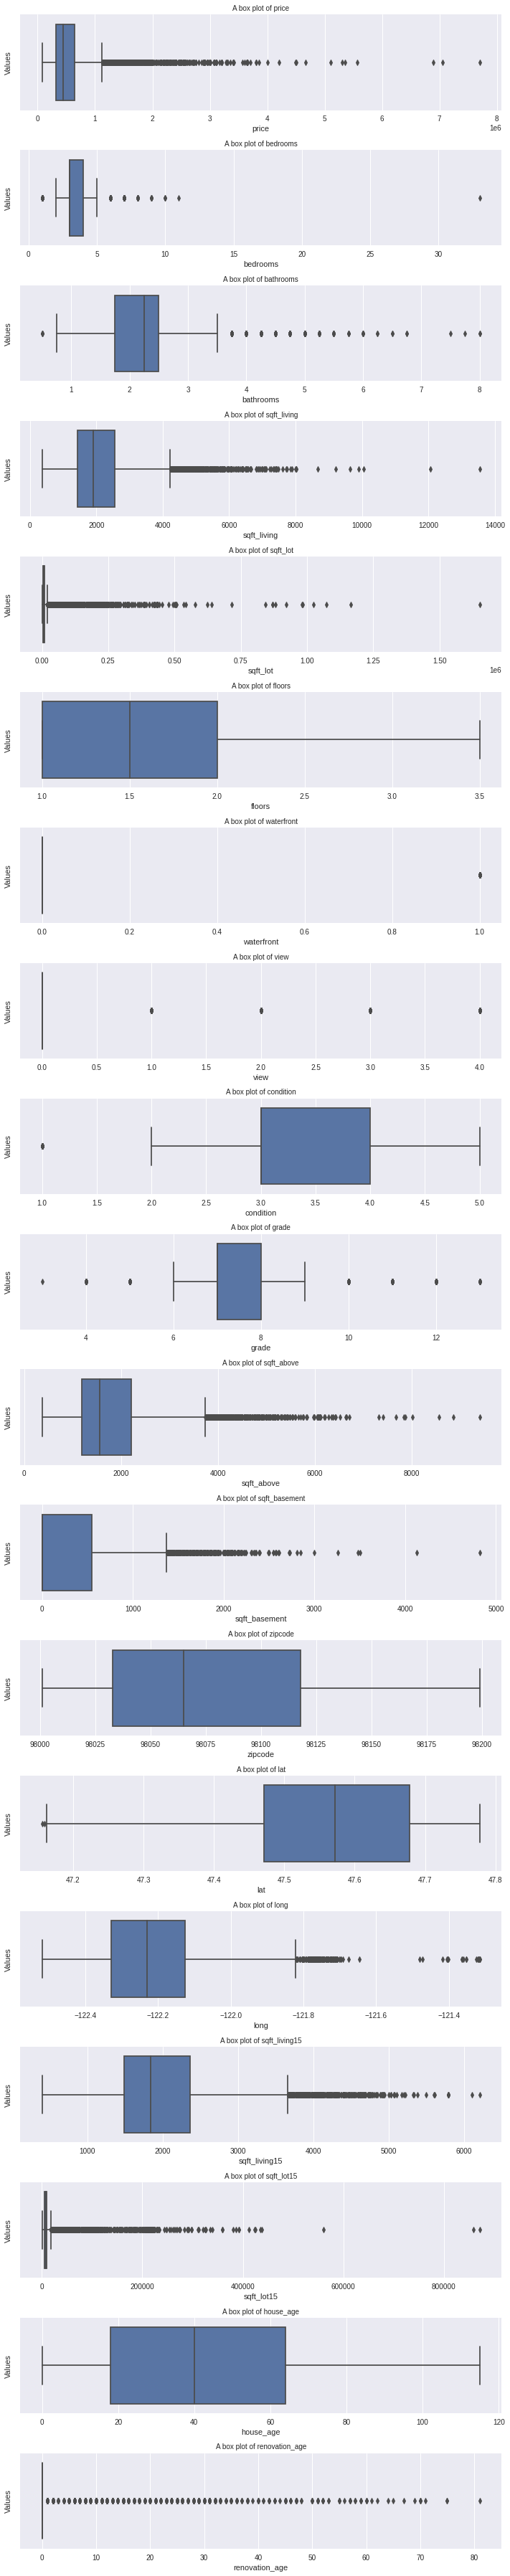

In [28]:
#Creating box plots to show if there are outlier
fig,ax=plt.subplots(len(statistics.columns),figsize=(10,50))
fig.set_tight_layout(True)
for i,col_vals in enumerate(statistics.columns):
  sns.boxplot(x = Houses[col_vals], ax=ax[i])
  ax[i].set_title('A box plot of '+format(col_vals),fontsize=10)
  ax[i].set_ylabel('Values')
plt.show()

* All the columns have outliers except the house age and zipcode column column

In [29]:
#Using the IQR to get rid of outliers.
cols1 = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','sqft_above','grade','condition',
        'sqft_living15',	'sqft_lot15',	'sqft_basement','lat','long']

Q1 = Houses[cols1].quantile(0.25)
Q3 = Houses[cols1].quantile(0.75)
IQR = Q3 - Q1

data = Houses[~((Houses[cols1] < (Q1 - 1.5 * IQR)) |(Houses[cols1] > (Q3 + 1.5 * IQR))).any(axis=1)]  
data     

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,house_age,renovation_age
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,98178,47.5112,-122.257,1340,5650,October,60,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,98125,47.7210,-122.319,1690,7639,December,64,24
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,98028,47.7379,-122.233,2720,8062,February,82,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,98136,47.5208,-122.393,1360,5000,December,50,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,98074,47.6168,-122.045,1800,7503,February,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,98103,47.6993,-122.346,1530,1509,May,6,0
21593,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,98146,47.5107,-122.362,1830,7200,February,1,0
21594,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,98144,47.5944,-122.299,1020,2007,June,6,0
21595,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,0.0,98027,47.5345,-122.069,1410,1287,January,11,0


## Exploratory Data Analysis

## Univariate analysis

In [30]:
#summary statistics
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovation_age
count,1.643200e+04,16432.000000,16432.000000,16432.000000,16432.000000,16432.000000,16432.000000,16432.000000,16432.000000,16432.000000,16432.000000,16432.000000,16432.000000,16432.000000,16432.000000,16432.000000,16432.000000,16432.000000,16432.000000
mean,4.525483e+05,3.268135,1.984192,1837.506694,7020.160906,1.466924,0.000974,0.132242,3.418208,7.401655,1589.700158,242.531828,98082.310492,47.560232,-122.235253,1815.469267,6899.560431,45.116419,0.538036
std,1.891235e+05,0.775774,0.649736,622.901485,3372.234438,0.544880,0.031190,0.549516,0.645300,0.812427,599.182720,362.720334,54.159370,0.140382,0.123783,513.786722,3002.539786,29.759295,4.241251
min,8.200000e+04,2.000000,0.750000,560.000000,520.000000,1.000000,0.000000,0.000000,2.000000,6.000000,480.000000,0.000000,98001.000000,47.189500,-122.503000,620.000000,651.000000,0.000000,0.000000
25%,3.060000e+05,3.000000,1.500000,1360.000000,4725.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1140.000000,0.000000,98033.000000,47.467175,-122.339000,1440.000000,4800.000000,18.000000,0.000000
50%,4.199250e+05,3.000000,2.000000,1770.000000,7000.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1440.000000,0.000000,98074.000000,47.570700,-122.272000,1720.000000,7129.000000,45.000000,0.000000
75%,5.650000e+05,4.000000,2.500000,2240.000000,8960.250000,2.000000,0.000000,0.000000,4.000000,8.000000,1920.000000,482.500000,98119.000000,47.682300,-122.159000,2130.000000,8684.500000,65.000000,0.000000
max,1.120000e+06,5.000000,3.500000,4200.000000,19141.000000,3.500000,1.000000,4.000000,5.000000,9.000000,3740.000000,1370.000000,98199.000000,47.777600,-121.821000,3640.000000,17550.000000,115.000000,81.000000


From the above summary:
* The average cost of a house is around 450,000 US Dollars
* The average interior living space of the houses is 7281 square feet
* The average overall condition for te houses was around 3 out of 5
* The average grading of the houses wa around 7,this is according to King county grading system
* The average age of the houses is 39 years with the oldest being 115 years
 

/home/elsie/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/elsie/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/elsie/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/elsi

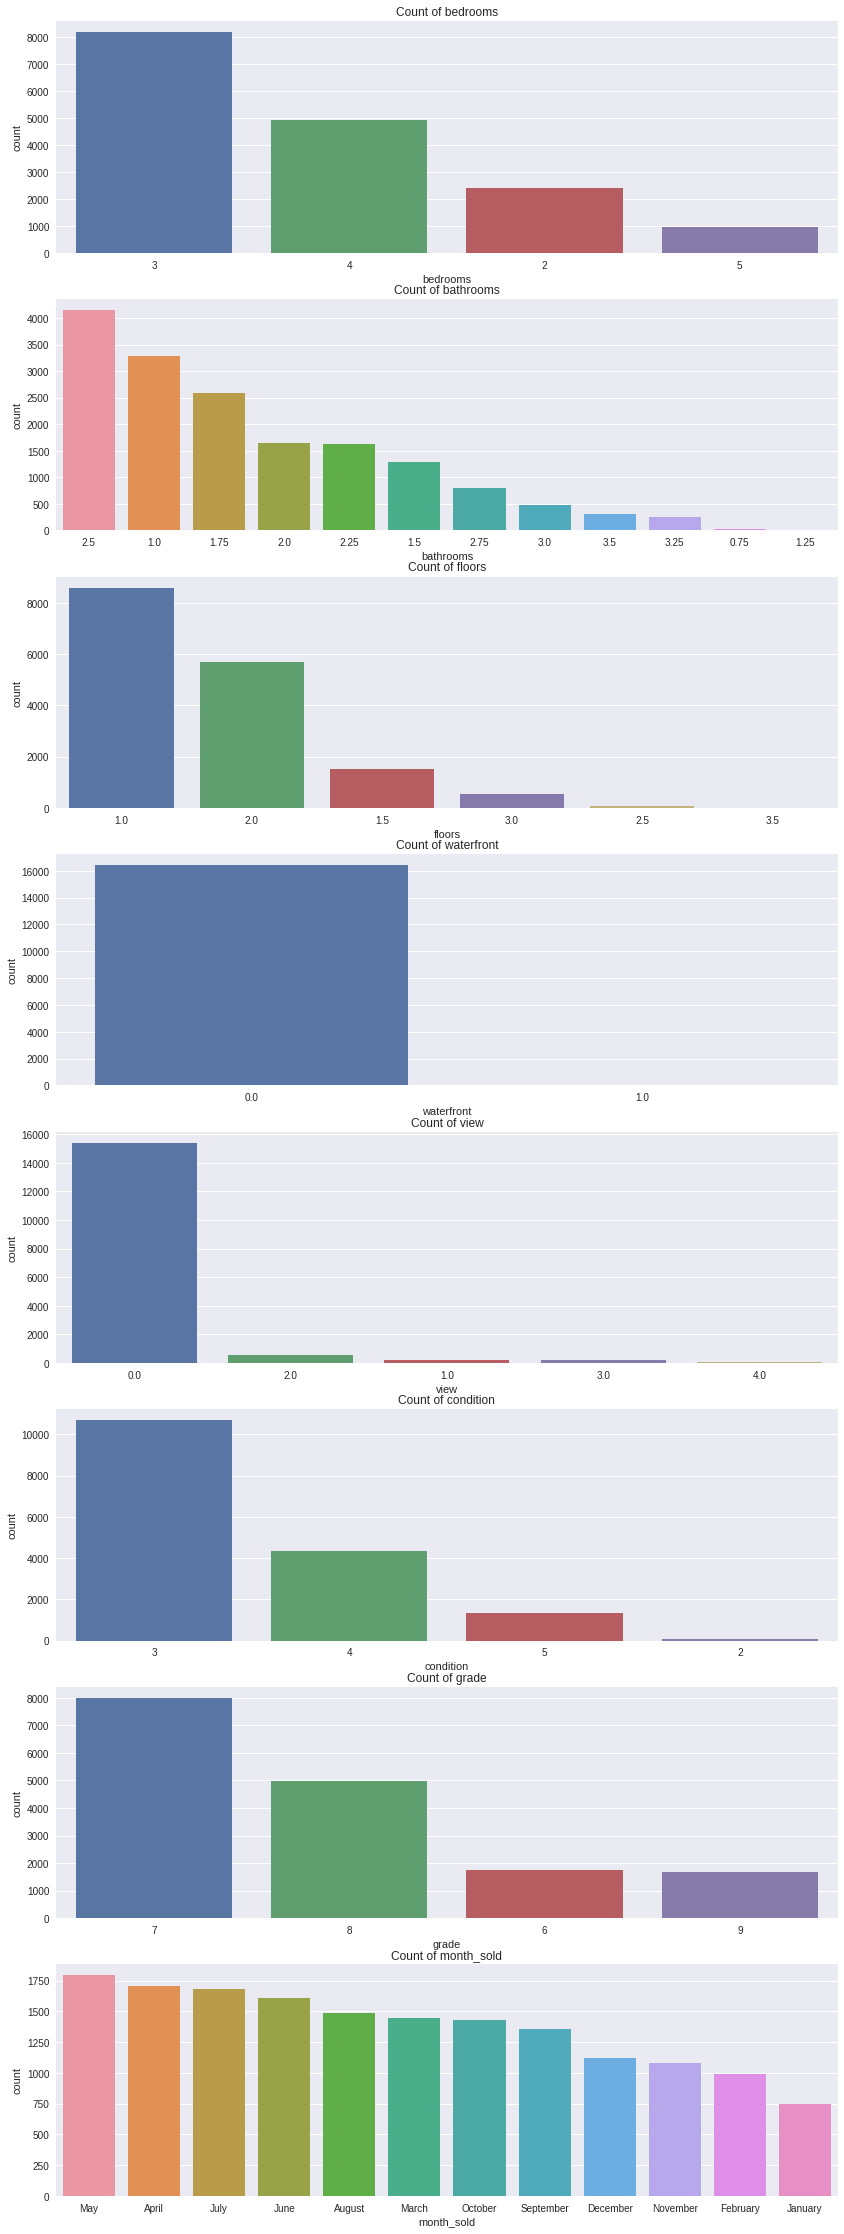

In [31]:
#ditributions of categorical variables
categoricals = ['bedrooms','bathrooms','floors','waterfront','view','condition','grade','month_sold']

#creating a function 
def plot_countplot (df,list_names):
    fig,ax=plt.subplots(len(list_names),figsize=(14,40))
    for i,cols in enumerate(list_names):
        sns.countplot(df[cols],order=df[cols].value_counts().index,ax=ax[i]) 
        ax[i].set_title('Count of '+format(cols))

plot_countplot(data,categoricals)    

From the above count plots we see that
* Most houses were sold in the month of may
* Most houses were given a grade of 7 
* With the removal of outliers all the houses have 2 bathrooms
* Most houses were given an overall condition of 3
* Most houses have 3 bedrooms followed by four bedroom houses
* Most Houses had 1 floor
* Most houses do not have a watefront



/home/elsie/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/elsie/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/elsie/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

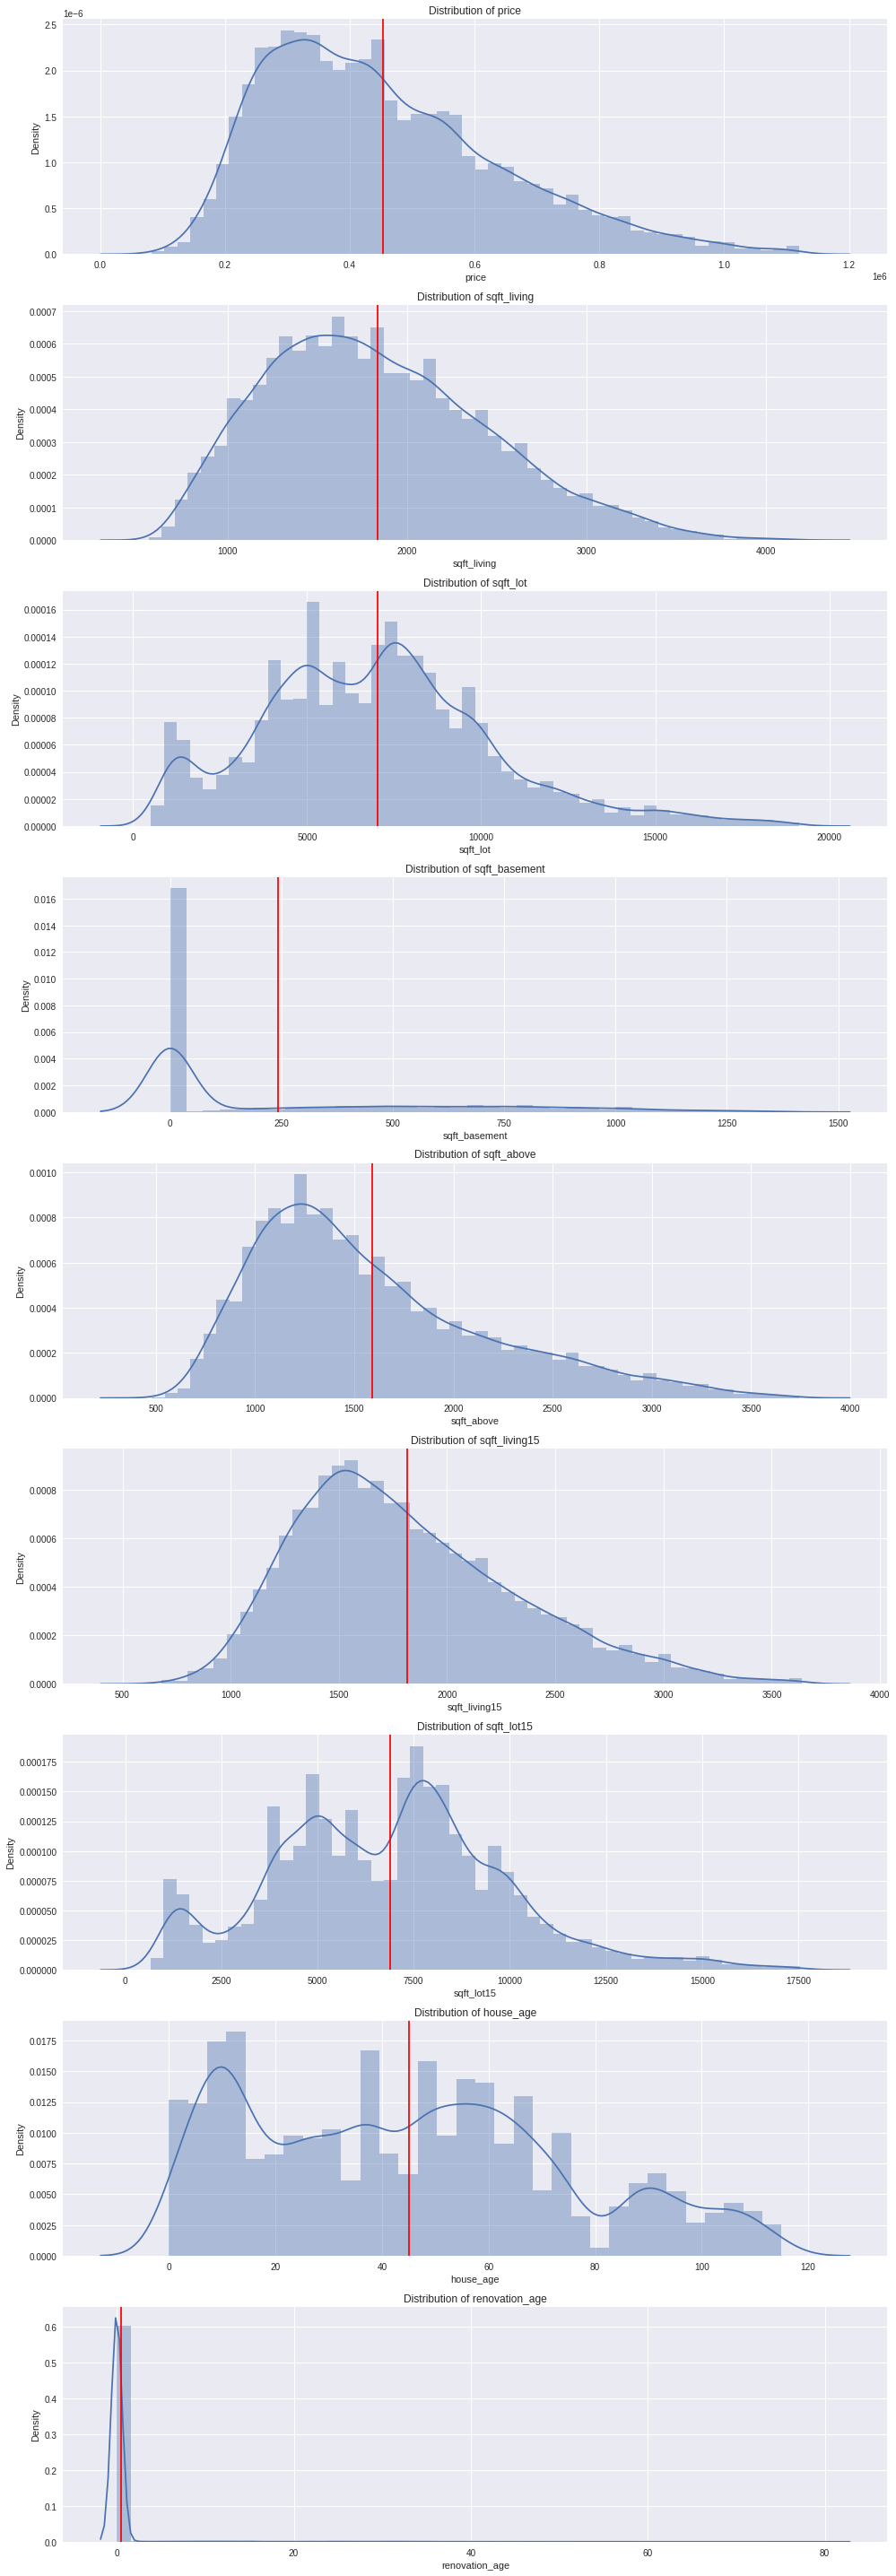

In [32]:
#ditributions of continous variables
continous = ['price','sqft_living','sqft_lot','sqft_basement','sqft_above','sqft_living15',	'sqft_lot15','house_age','renovation_age']
#creating a function 
def distribution (df,list_names):
    fig,ax=plt.subplots(len(list_names),figsize=(14,40))
    fig.set_tight_layout(True)
    for i,cols in enumerate(list_names):
        sns.distplot(df[cols],ax=ax[i],kde = True) 
        #Adding a vertical line to show the mean
        ax[i].axvline(x = df[cols].mean(),color = "red")
        ax[i].set_title('Distribution of '+format(cols))

distribution(data,continous)    

In [33]:
#Subsetting to get only the continous columns
Data1 = data[['price','sqft_living','sqft_lot','sqft_basement','sqft_above','sqft_lot15','sqft_living15','house_age','renovation_age']]
Data1

,price,sqft_living,sqft_lot,sqft_basement,sqft_above,sqft_lot15,sqft_living15,house_age,renovation_age
0,221900.0,1180,5650,0.0,1180,5650,1340,60,0
1,538000.0,2570,7242,400.0,2170,7639,1690,64,24
2,180000.0,770,10000,0.0,770,8062,2720,82,0
3,604000.0,1960,5000,910.0,1050,5000,1360,50,0
4,510000.0,1680,8080,0.0,1680,7503,1800,28,0
...,...,...,...,...,...,...,...,...,...
21592,360000.0,1530,1131,0.0,1530,1509,1530,6,0
21593,400000.0,2310,5813,0.0,2310,7200,1830,1,0
21594,402101.0,1020,1350,0.0,1020,2007,1020,6,0
21595,400000.0,1600,2388,0.0,1600,1287,1410,11,0


In [34]:
#Checking skewness of the continous variables to help me explain the distributions
Skewness= pd.DataFrame({'Skewness':Data1.skew()},index=Data1.columns)
Skewness

,Skewness
price,0.804384
sqft_living,0.524947
sqft_lot,0.562431
sqft_basement,1.232842
sqft_above,0.951162
sqft_lot15,0.349324
sqft_living15,0.706873
house_age,0.382448
renovation_age,10.083174


From the ditribution plots and the skewness table:
* basement column and renovation age are highly positively skewed and this can be explained by the fact that most of the values are 0
* Price is also positively skewed and from the distribution plot it shows most of the houses were sold below the mean
* Sqft_above is highly positively skewed most houses area above the basement was less than the mean
* The interior living space(sqft_living),sqft_lot,sqft_lot15 and house age are pretty symetric with a skewness 0f 0.55 and below
s




### Bivariate Analysis

Price being my target viarable,I want to investigate the relationship between the other variables and Price

In [35]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,house_age,renovation_age
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,98178,47.5112,-122.257,1340,5650,October,60,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,98125,47.7210,-122.319,1690,7639,December,64,24
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,98028,47.7379,-122.233,2720,8062,February,82,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,98136,47.5208,-122.393,1360,5000,December,50,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,98074,47.6168,-122.045,1800,7503,February,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,98103,47.6993,-122.346,1530,1509,May,6,0
21593,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,98146,47.5107,-122.362,1830,7200,February,1,0
21594,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,98144,47.5944,-122.299,1020,2007,June,6,0
21595,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,0.0,98027,47.5345,-122.069,1410,1287,January,11,0


In [36]:
#separating target and predictors
target = data['price']
predictors = data.drop('price',axis = 1)

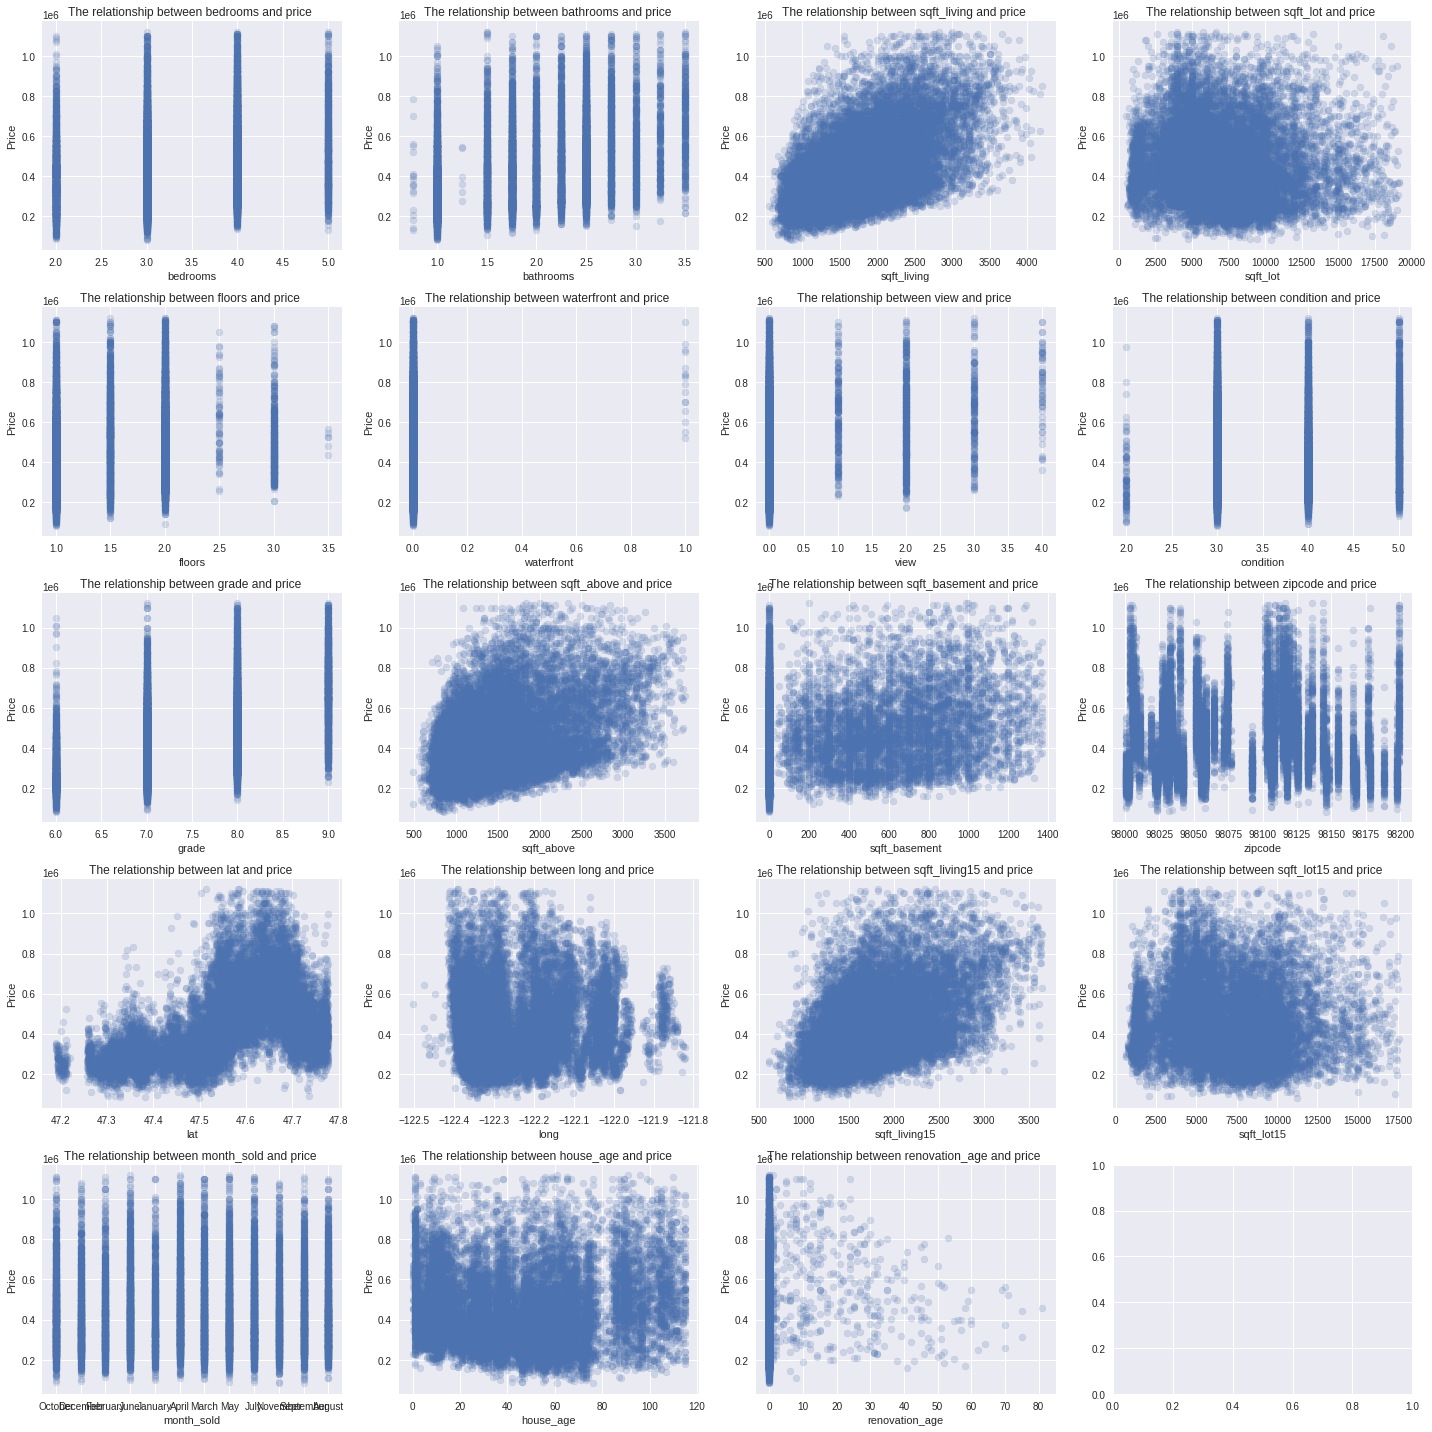

In [37]:
#Scatter plots to show the relationship between the other viriables and Price
scatterplot_data = predictors

fig, axes = plt.subplots(ncols=4, nrows=5, figsize=(20, 20))
fig.set_tight_layout(True)

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index//4][index%4]
    ax.scatter(predictors[col], target, alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("Price")
    ax.set_title('The relationship between '+str(col)+' and price ')

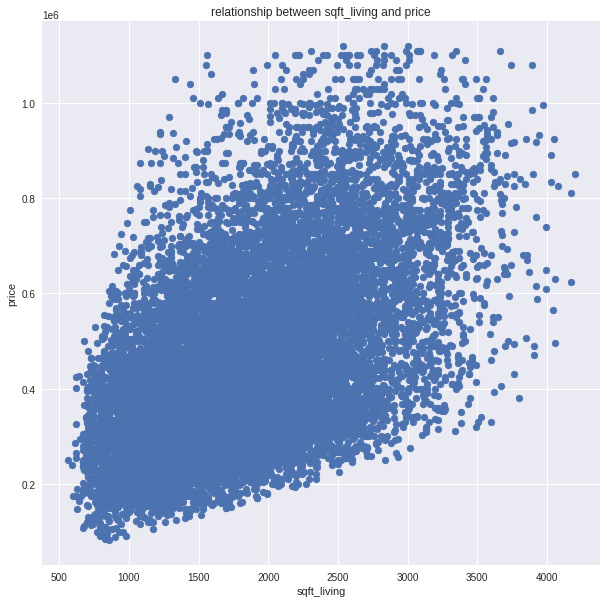

In [38]:
fig,ax = plt.subplots(figsize = (10,10))
ax.scatter(x=data['sqft_living'],y= data['price'])
ax.set_xlabel('sqft_living')
ax.set_ylabel('price')
ax.set_title('relationship between sqft_living and price')
plt.savefig('sqft_living.png')

From the scatter plots sqft_living.sqft_above and sqft_living 15 seems to have a very linear relationship with price. A better way to show the categorical variables would be to 
use a line plot. 

In [39]:
# Function for plotting line plots
def plot_line(data,col1,col2):
  plt.figure(figsize=(10,6))
  sns.lineplot(x=col1, y=col2,data=data)
  plt.title('The relationship between '+str(col1)+' and '+str(col2),fontsize=15)
  plt.show()

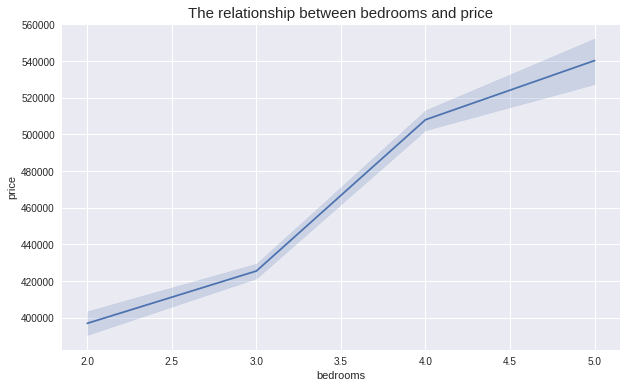

In [40]:
plot_line(data,'bedrooms','price')

From the plot above its clear that the more the number of bedrooms the more the price of the house.

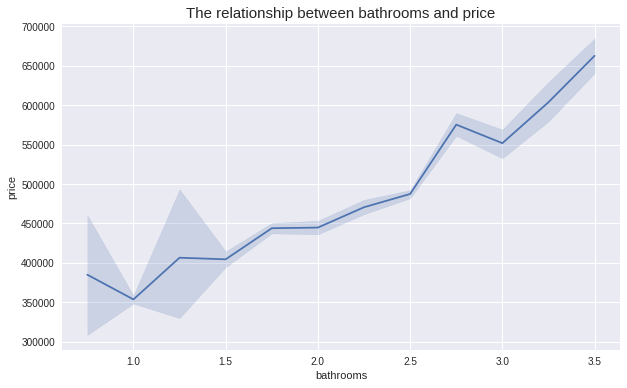

<Figure size 576x396 with 0 Axes>

In [41]:
plot_line(data,'bathrooms','price')
plt.savefig('bathroom.png')

From the plot above its clear that the more the number of bathrooms the more th e price of the house,although its interesting to see 2 bedroomed were more expensive than 3 bedroomed,and 4 bedroomed more expensive than than 5

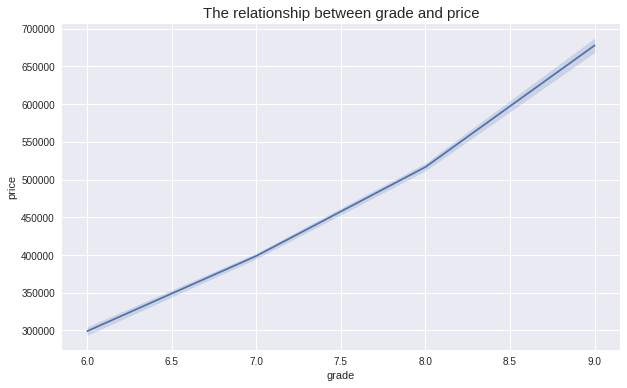

<Figure size 576x396 with 0 Axes>

In [42]:
plot_line(data,'grade','price')
plt.savefig('grade.png')

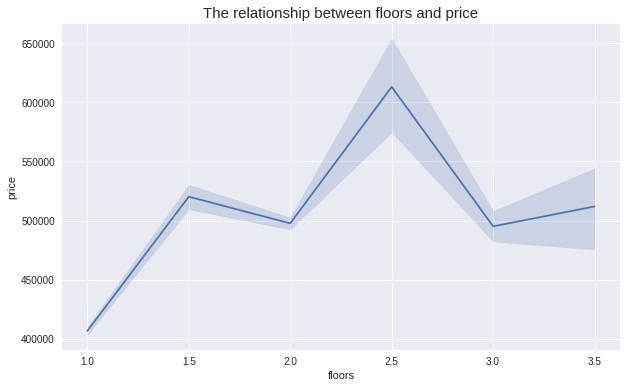

In [43]:
plot_line(data,'floors','price')

The more the floors the more the price,although houses with 3 or more floors were relatively cheaper

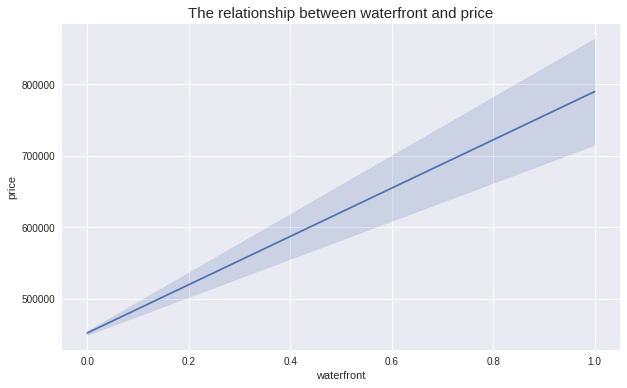

In [44]:
plot_line(data,'waterfront','price')

The presence of a waterfront clearly increases the price of the house

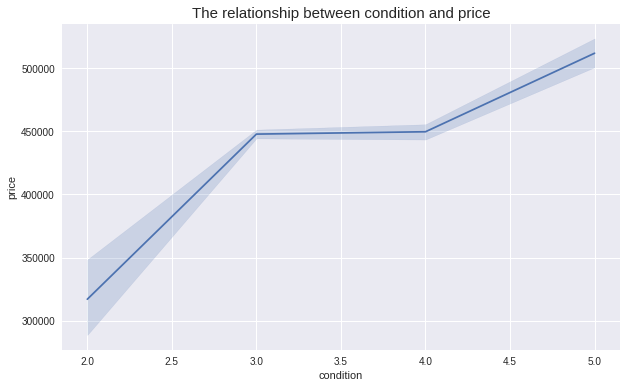

In [45]:
plot_line(data,'condition','price')

We expect that houses in a better condition would be more expensive and that is exactly what the above line plot shows

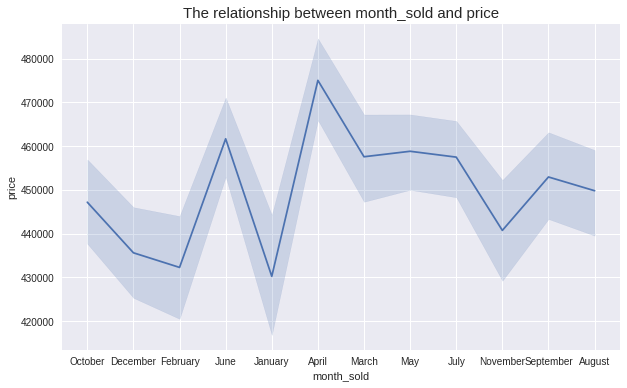

<Figure size 576x396 with 0 Axes>

In [46]:
plot_line(data,'month_sold','price')
plt.savefig('month.png')

Its interesting to see that houses sold in January were the cheapest and in April the houses were more expensive.May this could be attributed to as earlier seen,fewer houses were sold in January as compared to April.

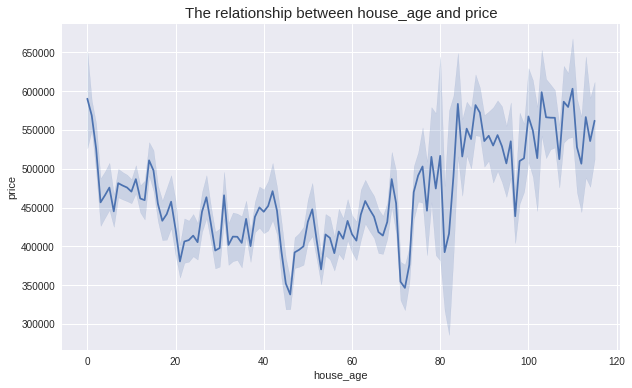

In [47]:
plot_line(data,'house_age','price')

Its also interesting to see that older houses seem to be more expensive,though the prices keep flactuating with the age.

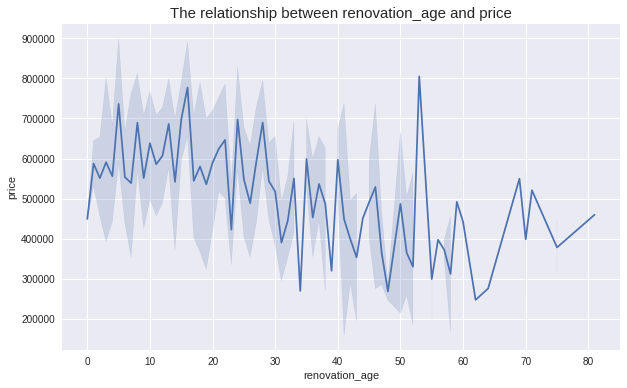

In [48]:
plot_line(data,'renovation_age','price')

Renovated houses also seem to be more expensive but as the age increases the value keeps flactuating,but if we focus on age 0 to 5 we see that renovated houses price increases

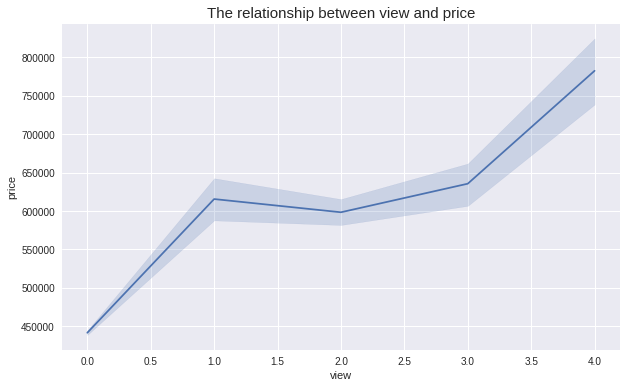

In [49]:
plot_line(data,'view','price')

Houses that wew viewed more time were more expensive

### Multivariate analysis


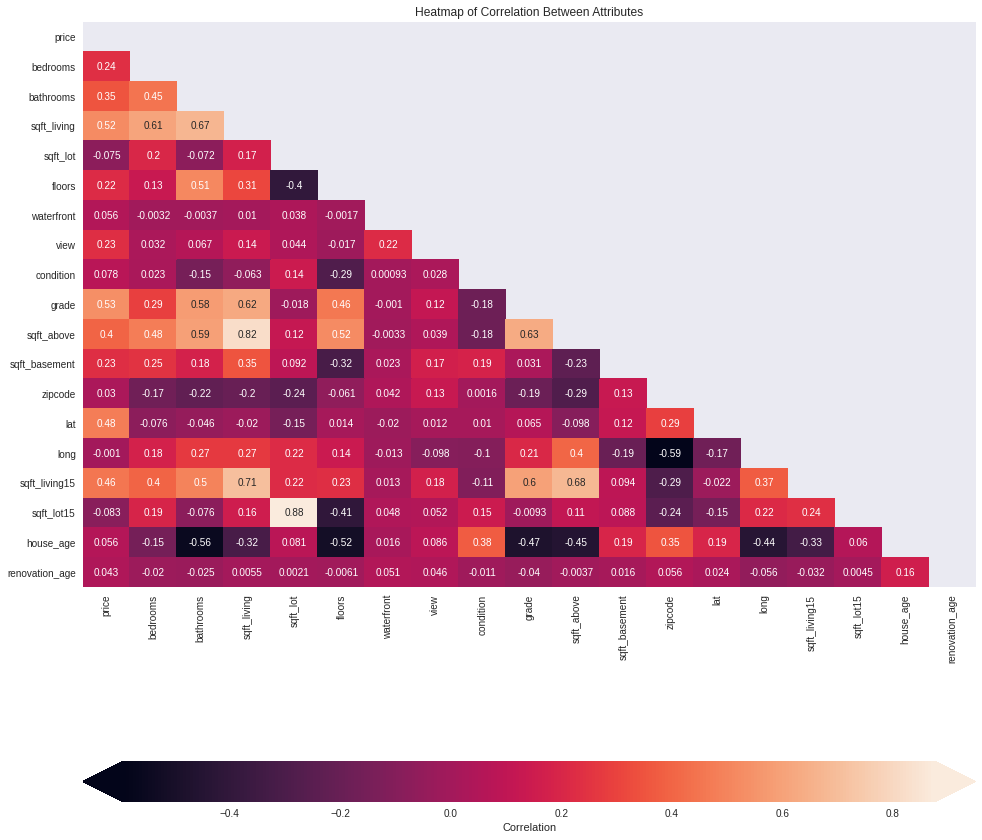

In [50]:
#Checking correlation between attributes
#Building a heatmap to show the correlation
def correlation(Data):
    corr = Data.corr()
    fig, ax = plt.subplots(figsize=(16, 16))

    sns.heatmap(
        data=corr,
        # The mask means we only show half the values, instead of showing duplicates
        mask=np.triu(np.ones_like(corr, dtype=bool)),
        ax=ax,
        # Specifies that we want labels, not just colors
        annot=True,
        # Customizes colorbar appearance
        cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
    )

        # Customize the plot appearance
    ax.set_title("Heatmap of Correlation Between Attributes")

correlation(data)


Using a threshhold of 0.7 for high correlation we see that sqft living has  a very high correlation with sqft_above,which might influence the model
Also sqft_lot15 has a high correlation with sqft_lot

I will drop sqft above and remain with sqft living,drop also sqft_lot15 and remain with sqft_lot

In [51]:
drop_columns(data,'sqft_above')

/home/elsie/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [52]:
drop_columns(data,'sqft_lot15')

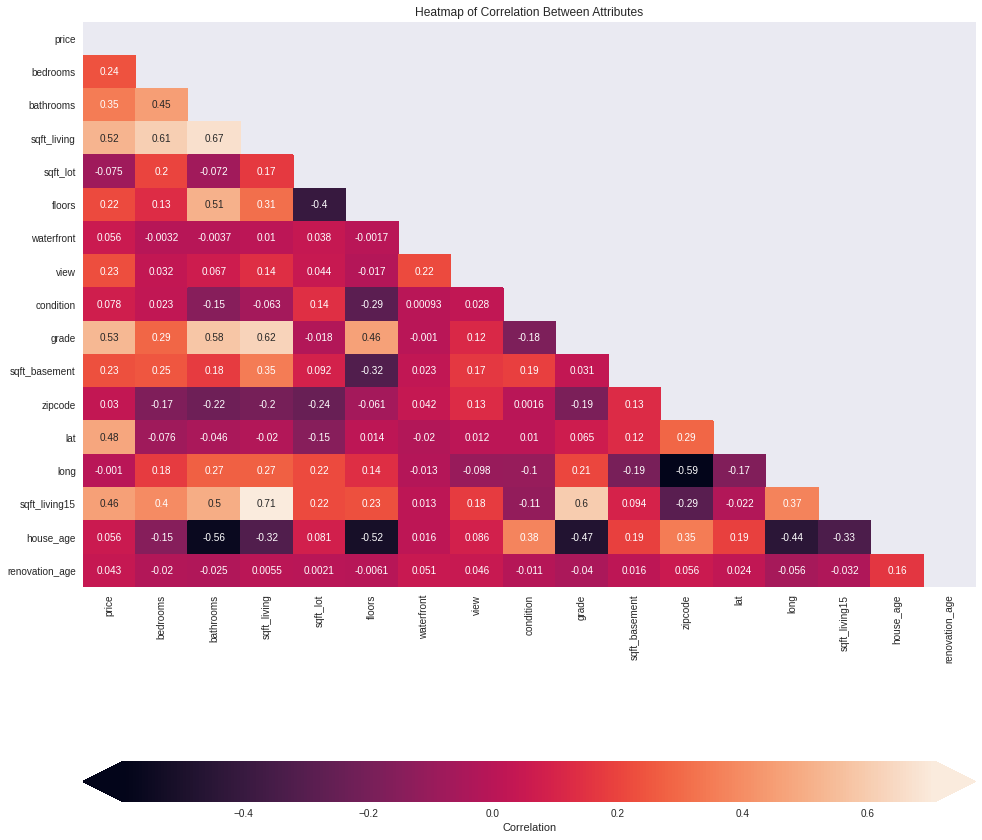

In [53]:
#Checking the correlation heatmap again after removing that column
correlation(data)

Now no attributes seem to be very strongly correlated

In [54]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,zipcode,lat,long,sqft_living15,month_sold,house_age,renovation_age
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,0.0,98178,47.5112,-122.257,1340,October,60,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,400.0,98125,47.7210,-122.319,1690,December,64,24
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,0.0,98028,47.7379,-122.233,2720,February,82,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,910.0,98136,47.5208,-122.393,1360,December,50,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,0.0,98074,47.6168,-122.045,1800,February,28,0


## Modelling

In [55]:
#Checking the most correlated feature with price 
correlation = data.iloc[:,0:].corr(method='pearson')
corr_price = correlation.price.sort_values(ascending=False)
corr_price

price             1.000000
grade             0.534513
sqft_living       0.523146
lat               0.476237
sqft_living15     0.456092
bathrooms         0.350147
bedrooms          0.236562
sqft_basement     0.232642
view              0.228574
floors            0.220818
condition         0.078428
house_age         0.056147
waterfront        0.055623
renovation_age    0.042871
zipcode           0.029785
long             -0.001043
sqft_lot         -0.074807
Name: price, dtype: float64

In [56]:
#I will drop the attributes negative correlation with price and columns am not going to use
#Dropping location features 
time_out = data[['zipcode','sqft_lot','long','month_sold']]
for loca in time_out:
    drop_columns(data,loca)

/home/elsie/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [57]:
data

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_basement,lat,sqft_living15,house_age,renovation_age
0,221900.0,3,1.00,1180,1.0,0.0,0.0,3,7,0.0,47.5112,1340,60,0
1,538000.0,3,2.25,2570,2.0,0.0,0.0,3,7,400.0,47.7210,1690,64,24
2,180000.0,2,1.00,770,1.0,0.0,0.0,3,6,0.0,47.7379,2720,82,0
3,604000.0,4,3.00,1960,1.0,0.0,0.0,5,7,910.0,47.5208,1360,50,0
4,510000.0,3,2.00,1680,1.0,0.0,0.0,3,8,0.0,47.6168,1800,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,3.0,0.0,0.0,3,8,0.0,47.6993,1530,6,0
21593,400000.0,4,2.50,2310,2.0,0.0,0.0,3,8,0.0,47.5107,1830,1,0
21594,402101.0,2,0.75,1020,2.0,0.0,0.0,3,7,0.0,47.5944,1020,6,0
21595,400000.0,3,2.50,1600,2.0,0.0,0.0,3,8,0.0,47.5345,1410,11,0


##### Feature scaling and log transformation 

Before modelling I will transform the continous variables that are skewed as seen ealier in the distribution plots

In [58]:
# log transformation to deal with outliers in the variables
log_df= pd.DataFrame([])
log_df['sqft_living15'] = np.log(data['sqft_living15'])
log_df['sqft_living'] = np.log(data['sqft_living'])
log_df['price'] = np.log(data['price'])

#creating logname variables
logliv15= log_df['sqft_living15']
logliv= log_df['sqft_living']
logprice = log_df['price']


# performing feature scaling 
scaled_liv15 = (logliv15- np.mean(logliv15)) / np.sqrt(np.var(logliv15))
scaled_price = (logprice - np.mean(logprice)) / np.sqrt(np.var(logprice))
scaled_liv = (logliv - np.mean(logliv)) / np.sqrt(np.var(logliv))




#creating a dataframe for new the newly scaled features
scaled_df = pd.DataFrame([])
scaled_df['liv15'] = scaled_liv15
scaled_df['liv'] = scaled_liv
scaled_df['price'] = scaled_price

In [59]:
#dropping the scaled features
time_out = ['sqft_living','price']
for col in time_out:
    drop_columns(data,col)

#merging the two dataframes contained scaled features and data
House= pd.concat([data, scaled_df], axis = 1)
House.head()    

/home/elsie/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_basement,lat,sqft_living15,house_age,renovation_age,liv15,liv,price
0,3,1.00,1.0,0.0,0.0,3,7,0.0,47.5112,1340,60,0,-0.950722,-1.099727,-1.489459
1,3,2.25,2.0,0.0,0.0,3,7,400.0,47.7210,1690,64,24,-0.117650,1.129911,0.616835
2,2,1.00,1.0,0.0,0.0,3,6,0.0,47.7379,2720,82,0,1.590804,-2.322488,-1.987165
3,4,3.00,1.0,0.0,0.0,5,7,910.0,47.5208,1360,50,0,-0.897537,0.353765,0.892040
4,3,2.00,1.0,0.0,0.0,3,8,0.0,47.6168,1800,28,0,0.108724,-0.087787,0.489720


##### Spliting the data 

In [60]:
#Spliting the data into training and testing
predictors = House.drop(['price'],axis = 1)
target = House['price']
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=0)
print(len(X_train), len(X_test), len(y_train), len(y_test))

13145 3287 13145 3287


#### Simple linear regression

##### Building a baseline model


I will start by building a simple linear regression model as my baseline model

I will aim for the highest  Rsquared adjusted  value as it shows the percentage of price predicted by the model and lowest Root Mean Squared Error (RMSE).

RSME indicates how close the observed data points are to the model's predicted values. Lower values of RMSE indicate better fit. RMSE is a good measure of how accurately the model predicts the response, and is the most important criterion for fit if the main purpose of the model is prediction.


For all models, we only wish to have statistically significant features (p-value below 0.05).

I will use the single feature of grade which looked to be a good predictor based on being the most positively correlated with price.




In [61]:
X_int = sm.add_constant(X_train['grade'])
base_model = sm.OLS(y_train, X_int).fit()
summary = base_model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     5440.
Date:                Sun, 03 Jul 2022   Prob (F-statistic):               0.00
Time:                        23:54:32   Log-Likelihood:                -16397.
No. Observations:               13145   AIC:                         3.280e+04
Df Residuals:                   13143   BIC:                         3.281e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.9415      0.067    -73.364      0.000      -5.074      -4.810
grade          0.6675      0.009     73.759      0.000       0.650       0.685
==============================================================================
Omnibus:                       64.099   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.598
Skew:                          -0.034   Prob(JB):                     4.61e-11
Kurtosis:                       2.713   Cond. No.                         69.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model indicates that only 29.3% of the variance in the prices can be explained by the model,which is not a very good fit

I will check the RSME

In [62]:
#reshaping
X_v = np.array(X_train['grade']).reshape(-1,1)

In [63]:
 linreg = LinearRegression()
 linreg.fit(X_v, y_train)

LinearRegression()

In [64]:
#Checking RSME
def check_fitting(X_variable,y_variable):
    scores = cross_validate(
        linreg,
        X_variable,
        y_variable,
        cv= 10,
        scoring="neg_mean_squared_error",
        return_train_score=True
    ) 

    validate = dict();

    validate['Train_rsme'] = np.sqrt(-scores["train_score"].mean())
    validate['Test_rsme'] = np.sqrt(-scores["test_score"].mean())


    return validate

In [65]:
Validate = check_fitting(X_v,y_train)
Validate

{'Train_rsme': 0.8423338080126299, 'Test_rsme': 0.8424242527443848}

Creating a table to clearly show my models performance so that as I continue building other models I append the table.

In [66]:
# Define table as a dataframe with specific columns. Each column's values will be a list that we will add to.
Evaluation_table = pd.DataFrame({'Model': [], ' Num Features' : [], 'Description':[],'R-squared':[],
                                'Adj R-squared':[], 'Train RSME': [],'Test RMSE':[]})

# Add data for simple linear regression
Evaluation_table.loc[0] = ['Base Model', base_model.df_model, 'most correlated feauture',round(base_model.rsquared,3)
                          ,round(base_model.rsquared_adj,3), Validate['Train_rsme'], Validate['Test_rsme']]

# View our evaluation table
Evaluation_table

,Model,Num Features,Description,R-squared,Adj R-squared,Train RSME,Test RMSE
0,Base Model,1.0,most correlated feauture,0.293,0.293,0.842334,0.842424


#### Multiple linear regression

Building a model with all the features


In [67]:
X_train.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_basement', 'lat', 'sqft_living15', 'house_age',
       'renovation_age', 'liv15', 'liv'],
      dtype='object')

In [68]:
X_var = X_train
predictors = sm.add_constant(X_var)
Model_1 = sm.OLS(y_train, predictors).fit()
summary = Model_1.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     2168.
Date:                Sun, 03 Jul 2022   Prob (F-statistic):               0.00
Time:                        23:54:34   Log-Likelihood:                -10803.
No. Observations:               13145   AIC:                         2.164e+04
Df Residuals:                   13130   BIC:                         2.175e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -162.8749      1.726    -94.371      0.000    -166.258    -159.492
bedrooms          -0.0726      0.008     -8.962      0.000      -0.088      -0.057
bathrooms          0.1479      0.013     11.638      0.000       0.123       0.173
floors             0.1929      0.013     15.215      0.000       0.168       0.218
waterfront         1.0047      0.152      6.624      0.000       0.707       1.302
view               0.1274      0.009     13.463      0.000       0.109       0.146
condition          0.1221      0.008     14.868      0.000       0.106       0.138
grade              0.3873      0.009     43.499      0.000       0.370       0.405
sqft_basement   3.953e-05   1.77e-05      2.229      0.026    4.76e-06    7.43e-05
lat                3.3310      0.036     91.351      0.000       3.260       3.403
sqft_living15      0.0002   5.56e-05      3.818      0.000       0.000       0.000
house_age          0.0092      0.000     38.506      0.000       0.009       0.010
renovation_age    -0.0008      0.001     -0.662      0.508      -0.003       0.001
liv15              0.0345      0.028      1.212      0.226      -0.021       0.090
liv                0.2506      0.010     24.558      0.000       0.231       0.271
==============================================================================
Omnibus:                      149.594   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.397
Skew:                          -0.125   Prob(JB):                     5.10e-49
Kurtosis:                       3.586   Cond. No.                     6.84e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.84e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model_1 R qquared value is 0.698 which is an improvement from the base_model.

Model_1 explains 69.8% of the variance in prices using all the features.

Also the pvalues of the variables are all below 0.05

In [69]:
#Instantiate a linear regression model 
model1 = LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

#### Checking assumptions of linear regression on the model

#### Investigating linearity


No handles with labels found to put in legend.


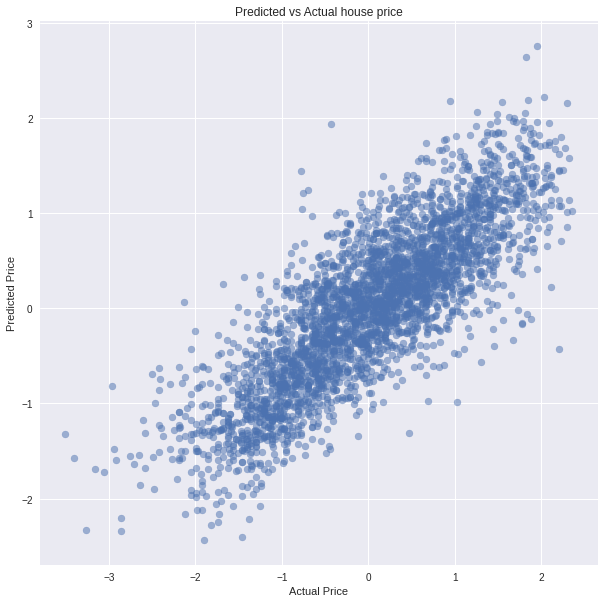

In [70]:
#Creating a funcion to plot 
preds = model1.predict(X_test)
fig, ax = plt.subplots(figsize = (10,10))

perfect_line = np.arange(y_test.min(), y_test.max())
ax.scatter(y_test, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.set_title("Predicted vs Actual house price")
ax.legend();
   

Linearity assumption holds

#### Investigating normality

/tmp/ipykernel_43571/896905862.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


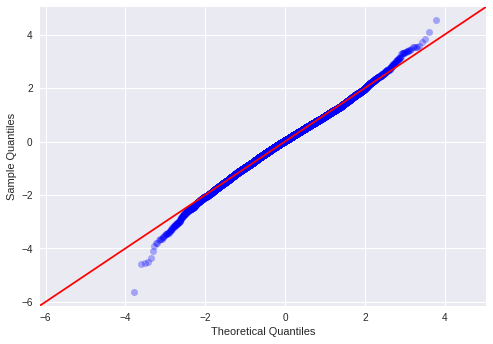

In [71]:
#Defining a function to plot Q_Q plot
def Q_Q_plot (model):
    residuals = model.resid
    fig = sm.graphics.qqplot(residuals, dist=stats.norm, alpha = 0.3, line='45', fit=True)
    fig.show()
Q_Q_plot(Model_1)    
   

The residuals seem to be normally distributed

#### Investigating multicollinearity

Using the Variance Inflation factor to check for multicolinearity with thresh hold of 5. 

Variables with VIF of 5 or greater are displaying multicollinearity with other variables in the feature set. 

In [72]:
#Creating a function to calculate VIF
def VIF(X_variable):
    vif = [variance_inflation_factor(X_variable.values, i) for i in range(X_variable.shape[1])]
    vif_values= pd.Series(vif, index=X_variable.columns, name="Variance Inflation Factor")

    return vif_values
VIF(X_train)    
    

bedrooms           31.957621
bathrooms          30.518376
floors             16.784215
waterfront          1.061457
view                1.211429
condition          35.199256
grade             186.899608
sqft_basement       2.545422
lat               700.100927
sqft_living15     474.241912
house_age           6.821901
renovation_age      1.067659
liv15              34.767219
liv                 4.482028
Name: Variance Inflation Factor, dtype: float64

The independence assumptions of the independent variable is not satified

#### Investigating homoscedasticity

I will perform a hypothesis testing using Goldfeld Quandt we test for heteroscedasticity.

* Null Hypothesis: Error terms are homoscedastic

* Alternative Hypothesis: Error terms are heteroscedastic.

In [73]:
residuals = Model_1.resid
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, test)

[('F statistic', 1.0246004345714281), ('p-value', 0.16255190632787717)]

The P_value is greater than 0.05,we fail to reject the null hypothesis and conclude that the error terms are homoscedastic

Thus the assumption is not violated

In [74]:
#Checking the RSME for train and test score
Validate1 = check_fitting(X_train,y_train)
Validate1

{'Train_rsme': 0.5503836646126542, 'Test_rsme': 0.5510490997926328}

In [75]:
#Append the table of evaluation
Evaluation_table.loc[1] = ['Model 1', Model_1.df_model,'All features', round(Model_1.rsquared,3)
                          ,round(Model_1.rsquared_adj,3),Validate1['Train_rsme'], Validate1['Test_rsme'] ]
Evaluation_table                          


,Model,Num Features,Description,R-squared,Adj R-squared,Train RSME,Test RMSE
0,Base Model,1.0,most correlated feauture,0.293,0.293,0.842334,0.842424
1,Model 1,14.0,All features,0.698,0.698,0.550384,0.551049


The RSME for the Train and Test data are not far apart meaning our model doest not appear to be overfitting.

Converting categorical variables to dummy variables

In [76]:
X_train1 = X_train.copy()
X_train1.head()

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_basement,lat,sqft_living15,house_age,renovation_age,liv15,liv
12545,4,1.00,1.0,0.0,0.0,3,7,1120.0,47.5089,1080,49,0,-1.725098,0.736254
19534,3,1.75,1.0,0.0,0.0,3,7,400.0,47.6368,1750,62,0,0.007593,-0.822309
5563,2,1.00,1.0,0.0,0.0,3,6,100.0,47.5282,1880,99,0,0.264832,-2.039352
8836,4,1.00,1.0,0.0,2.0,4,6,420.0,47.4894,1060,72,0,-1.792202,-0.156813
16147,3,1.00,1.0,0.0,0.0,3,7,0.0,47.7161,1990,67,0,0.468965,-0.589645


In [77]:
#Converting sqft_basement to categorical to denote whether a house has a basement or not
X_train1['sqft_basement'] = X_train1['sqft_basement'].map(lambda x: 1 if x > 0 else 0)

X_test1 = X_test.copy()
X_test1['sqft_basement'] = X_test1['sqft_basement'].map(lambda x: 1 if x > 0 else 0)

In [78]:
# creating a function to convert categorical columns to numeric
def one_hot_encode(df, catcols):
    '''Returns df with dummy vars and drops original column'''
    
    # Create DataFrame with above columns
    dfonehot = df[catcols].astype('category')
    
    # Get dummy variables and drop first one to not create dependency
    dfonehot = pd.get_dummies(dfonehot, drop_first = True)
    
    # Recreate DataFrame with one-hot encoded variables
    df = pd.concat([df,dfonehot], axis=1)
    
    # Drop columns where we have done one-hot encoding
    df = df.drop(catcols, axis = 1)
        
    return df

In [79]:
#Defining thecategory columns
Cat_columns = ['bedrooms','bathrooms','floors','waterfront','view',	'condition'	,'sqft_basement']

#Converting for the train data
X_train2 = one_hot_encode(X_train1,Cat_columns)

#Converting for the test data
X_test2= one_hot_encode(X_test1,Cat_columns)





In [80]:
X_train2

,grade,lat,sqft_living15,house_age,renovation_age,liv15,liv,bedrooms_3,bedrooms_4,bedrooms_5,...,floors_3.5,waterfront_1.0,view_1.0,view_2.0,view_3.0,view_4.0,condition_3,condition_4,condition_5,sqft_basement_1
12545,7,47.5089,1080,49,0,-1.725098,0.736254,0,1,0,...,0,0,0,0,0,0,1,0,0,1
19534,7,47.6368,1750,62,0,0.007593,-0.822309,1,0,0,...,0,0,0,0,0,0,1,0,0,1
5563,6,47.5282,1880,99,0,0.264832,-2.039352,0,0,0,...,0,0,0,0,0,0,1,0,0,1
8836,6,47.4894,1060,72,0,-1.792202,-0.156813,0,1,0,...,0,0,0,1,0,0,0,1,0,1
16147,7,47.7161,1990,67,0,0.468965,-0.589645,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12185,9,47.6599,2670,28,0,1.524199,1.239254,1,0,0,...,0,0,0,0,0,0,1,0,0,0
17341,7,47.7723,1830,32,0,0.168063,0.551389,0,0,1,...,0,0,0,0,0,0,1,0,0,1
13004,7,47.3775,1360,68,0,-0.897537,-0.393376,1,0,0,...,0,0,0,0,0,0,1,0,0,0
14265,7,47.6737,2160,63,0,0.763243,0.671592,1,0,0,...,0,0,0,1,0,0,0,0,1,1


##### Model 2

Creating model with all the features now after converting all the categorical variables to dummy variables

In [81]:
#Defining a funtion to build OLS model
def OLS_model(X_variable,y_variable):
    X_var = X_variable
    predictors = sm.add_constant(X_var)
    Model = sm.OLS(y_variable, predictors).fit()
    return Model

In [82]:
#Creating model 2
Model_2 = OLS_model(X_train2,y_train)
Model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     879.3
Date:                Sun, 03 Jul 2022   Prob (F-statistic):               0.00
Time:                        23:54:38   Log-Likelihood:                -10732.
No. Observations:               13145   AIC:                         2.154e+04
Df Residuals:                   13109   BIC:                         2.181e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -160.9035      1.749    -91.997      0.000    -164.332    -157.475
grade               0.3880      0.009     43.688      0.000       0.371       0.405
lat                 3.2969      0.037     89.610      0.000       3.225       3.369
sqft_living15       0.0002   5.79e-05      3.446      0.001     8.6e-05       0.000
house_age           0.0085      0.000     31.612      0.000       0.008       0.009
renovation_age     -0.0007      0.001     -0.587      0.558      -0.003       0.002
liv15               0.0450      0.029      1.524      0.127      -0.013       0.103
liv                 0.2379      0.010     24.089      0.000       0.219       0.257
bedrooms_3         -0.1424      0.016     -8.832      0.000      -0.174      -0.111
bedrooms_4         -0.1710      0.020     -8.696      0.000      -0.210      -0.132
bedrooms_5         -0.2511      0.028     -8.974      0.000      -0.306      -0.196
bathrooms_1.0       0.0558      0.134      0.417      0.676      -0.206       0.318
bathrooms_1.25     -0.1095      0.279     -0.392      0.695      -0.657       0.438
bathrooms_1.5       0.1001      0.135      0.744      0.457      -0.164       0.364
bathrooms_1.75      0.1936      0.134      1.443      0.149      -0.069       0.457
bathrooms_2.0       0.2213      0.134      1.646      0.100      -0.042       0.485
bathrooms_2.25      0.1799      0.135      1.333      0.183      -0.085       0.445
bathrooms_2.5       0.2524      0.135      1.870      0.061      -0.012       0.517
bathrooms_2.75      0.3073      0.136      2.256      0.024       0.040       0.574
bathrooms_3.0       0.2857      0.137      2.078      0.038       0.016       0.555
bathrooms_3.25      0.3664      0.140      2.608      0.009       0.091       0.642
bathrooms_3.5       0.4302      0.140      3.075      0.002       0.156       0.705
floors_1.5          0.1724      0.019      9.062      0.000       0.135       0.210
floors_2.0          0.2213      0.016     13.919      0.000       0.190       0.252
floors_2.5          0.4205      0.073      5.730      0.000       0.277       0.564
floors_3.0          0.3806      0.032     11.951      0.000       0.318       0.443
floors_3.5          0.4998      0.246      2.030      0.042       0.017       0.983
waterfront_1.0      0.9558      0.174      5.495      0.000       0.615       1.297
view_1.0            0.3049      0.043      7.104      0.000       0.221       0.389
view_2.0            0.2592      0.027      9.593      0.000       0.206       0.312
view_3.0            0.2747      0.045      6.078      0.000       0.186       0.363
view_4.0            0.5454      0.093      5.846      0.000       0.363       0.728
condition_3         0.2202      0.062      3.530      0.000       0.098       0.342
condition_4         0.3481      0.063      5.562      0.000

The Rquared for this model is 0.709 a significant improvement from model1,this model explains 70.9% of the variance in price

There are also some features that have a p_value more than .05



In [83]:
#Check fitting
validate3 = check_fitting(X_train2,y_train)

In [84]:
#Append the table of evaluation
Evaluation_table.loc[2] = ['Model 2', Model_2.df_model,'Features with dummy variables' ,round(Model_2.rsquared,3)
                          ,round(Model_2.rsquared_adj,3), validate3['Train_rsme'], validate3['Test_rsme'] ]
Evaluation_table      

,Model,Num Features,Description,R-squared,Adj R-squared,Train RSME,Test RMSE
0,Base Model,1.0,most correlated feauture,0.293,0.293,0.842334,0.842424
1,Model 1,14.0,All features,0.698,0.698,0.550384,0.551049
2,Model 2,35.0,Features with dummy variables,0.701,0.700,0.547346,0.549120


The mean RSME of model_2 has slightly reduced from the previous model,also the adjusted Rsquared has increase slightly

However the effect of one hot encoding was limited

#### Feature Selection

##### Model_4

Select important features using Feature Ranking with Recursive Feature Elimination

In [85]:
# Defining the splitter
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)
# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients
X_train_for_RFECV = StandardScaler().fit_transform(X_train)

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(X_train):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
bedrooms: True
bathrooms: True
floors: True
waterfront: True
view: True
condition: True
grade: True
sqft_basement: True
lat: True
sqft_living15: True
house_age: True
renovation_age: False
liv15: True
liv: True


The algorithm is saying that the model it could find was with all the features except one,renovation age

Dropping it to see how our model changes

In [86]:
features =X_train.copy()
drop_columns(features,'renovation_age')

In [87]:
features

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_basement,lat,sqft_living15,house_age,liv15,liv
12545,4,1.00,1.0,0.0,0.0,3,7,1120.0,47.5089,1080,49,-1.725098,0.736254
19534,3,1.75,1.0,0.0,0.0,3,7,400.0,47.6368,1750,62,0.007593,-0.822309
5563,2,1.00,1.0,0.0,0.0,3,6,100.0,47.5282,1880,99,0.264832,-2.039352
8836,4,1.00,1.0,0.0,2.0,4,6,420.0,47.4894,1060,72,-1.792202,-0.156813
16147,3,1.00,1.0,0.0,0.0,3,7,0.0,47.7161,1990,67,0.468965,-0.589645
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12185,3,2.50,2.0,0.0,0.0,3,9,0.0,47.6599,2670,28,1.524199,1.239254
17341,5,2.50,1.0,0.0,0.0,3,7,960.0,47.7723,1830,32,0.168063,0.551389
13004,3,1.50,1.5,0.0,0.0,3,7,0.0,47.3775,1360,68,-0.897537,-0.393376
14265,3,2.00,1.0,0.0,2.0,5,7,930.0,47.6737,2160,63,0.763243,0.671592


In [88]:
features_model = OLS_model(features,y_train)
features_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     2335.
Date:                Sun, 03 Jul 2022   Prob (F-statistic):               0.00
Time:                        23:54:40   Log-Likelihood:                -10804.
No. Observations:               13145   AIC:                         2.164e+04
Df Residuals:                   13131   BIC:                         2.174e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -162.8992      1.725    -94.409      0.000    -166.281    -159.517
bedrooms         -0.0724      0.008     -8.943      0.000      -0.088      -0.057
bathrooms         0.1475      0.013     11.620      0.000       0.123       0.172
floors            0.1925      0.013     15.201      0.000       0.168       0.217
waterfront        1.0011      0.152      6.605      0.000       0.704       1.298
view              0.1273      0.009     13.454      0.000       0.109       0.146
condition         0.1225      0.008     14.960      0.000       0.106       0.139
grade             0.3874      0.009     43.521      0.000       0.370       0.405
sqft_basement  3.983e-05   1.77e-05      2.246      0.025    5.08e-06    7.46e-05
lat               3.3315      0.036     91.387      0.000       3.260       3.403
sqft_living15     0.0002   5.55e-05      3.811      0.000       0.000       0.000
house_age         0.0092      0.000     39.103      0.000       0.009       0.010
liv15             0.0348      0.028      1.224      0.221      -0.021       0.091
liv               0.2502      0.010     24.558      0.000       0.230       0.270
==============================================================================
Omnibus:                      149.557   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.337
Skew:                          -0.125   Prob(JB):                     5.25e-49
Kurtosis:                       3.586   Cond. No.                     6.84e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.84e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Variable selection using feature ranking reduces the adjusted R value to 0.698

In [89]:
features1 = LinearRegression()
features1.fit(features,y_train)

LinearRegression()

In [90]:
Validate5 = check_fitting(features,y_train)

In [91]:
#Append the table of evaluation
Evaluation_table.loc[3] = ['Model 3', features_model.df_model,'Feautures chosen using feature ranking' ,round(features_model.rsquared,3)
                          ,round(features_model.rsquared_adj,3), Validate5['Train_rsme'], Validate5['Test_rsme']]
Evaluation_table      

,Model,Num Features,Description,R-squared,Adj R-squared,Train RSME,Test RMSE
0,Base Model,1.0,most correlated feauture,0.293,0.293,0.842334,0.842424
1,Model 1,14.0,All features,0.698,0.698,0.550384,0.551049
2,Model 2,35.0,Features with dummy variables,0.701,0.700,0.547346,0.549120
3,Model 3,13.0,Feautures chosen using feature ranking,0.698,0.698,0.550394,0.551042


The RSME aslo increases with this model

#### Interactions

An interaction is a particular property of three or more variables, where two or more variables interact in a non-additive manner when affecting a third variable. In other words, the two variables interact to have an effect that is more (or less) than the sum of their parts.



In [92]:
#Instantiating regression model
regression = LinearRegression()

In [93]:
#Defining validation score
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)

In [94]:
#Recreating the model with dummy variables

model5= np.mean(cross_val_score(regression, X_train2, y_train, scoring='r2', cv=crossvalidation))

#Getting the Rsquared value
model5

0.6993026565083931

In [95]:
#Getting combinations and the top most interactions with price interaction on the rscore of Model2 
from itertools import combinations

interactions = []

feat_combinations = combinations(X_train2.columns, 2)

data = X_train2.copy()
for i, (a, b) in enumerate(feat_combinations):
    data['interaction'] = data[a] * data[b]
    score = np.mean(cross_val_score(regression, data, y_train, scoring='r2', cv=crossvalidation))
    if score > model5:
        interactions.append((a, b, round(score,3)))
    
    if i % 50 == 0:
        print(i)
            
print('Top 10 interactions: %s' %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:10])

0
50
100
150
200
250
300
350
400
450
500
550
Top 10 interactions: [('lat', 'house_age', 0.702), ('lat', 'floors_3.0', 0.701), ('house_age', 'floors_1.5', 0.701), ('house_age', 'floors_2.0', 0.701), ('grade', 'sqft_living15', 0.7), ('grade', 'liv15', 0.7), ('grade', 'floors_1.5', 0.7), ('grade', 'floors_3.0', 0.7), ('lat', 'sqft_living15', 0.7), ('lat', 'bedrooms_3', 0.7)]


In [96]:
#Creating a model with the top interaction features
regression = LinearRegression()
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
interactions_df = X_train2.copy()

interactions_df['lat*floors_3.0'] = interactions_df['lat'] * interactions_df['floors_3.0']

model6 = np.mean(cross_val_score(regression, interactions_df, y_train, scoring='r2', cv=crossvalidation))

model6

0.701420755550944

In [97]:
#Getting the top_10 interaction features
Top_10_interactions = sorted(interactions, key=lambda inter: inter[2], reverse=True)[:10]
Top_10_interactions

[('lat', 'house_age', 0.702),
 ('lat', 'floors_3.0', 0.701),
 ('house_age', 'floors_1.5', 0.701),
 ('house_age', 'floors_2.0', 0.701),
 ('grade', 'sqft_living15', 0.7),
 ('grade', 'liv15', 0.7),
 ('grade', 'floors_1.5', 0.7),
 ('grade', 'floors_3.0', 0.7),
 ('lat', 'sqft_living15', 0.7),
 ('lat', 'bedrooms_3', 0.7)]

In [98]:
#Iterating through the top ten features to add them to our dataframe
for pair in Top_10_interactions:
    interactions_df[f"{pair[0]}_x_{pair[1]}"] = interactions_df[pair[0]]*interactions_df[pair[1]]

In [99]:
interactions_df

,grade,lat,sqft_living15,house_age,renovation_age,liv15,liv,bedrooms_3,bedrooms_4,bedrooms_5,...,lat_x_house_age,lat_x_floors_3.0,house_age_x_floors_1.5,house_age_x_floors_2.0,grade_x_sqft_living15,grade_x_liv15,grade_x_floors_1.5,grade_x_floors_3.0,lat_x_sqft_living15,lat_x_bedrooms_3
12545,7,47.5089,1080,49,0,-1.725098,0.736254,0,1,0,...,2327.9361,0.0,0,0,7560,-12.075688,0,0,51309.612,0.0000
19534,7,47.6368,1750,62,0,0.007593,-0.822309,1,0,0,...,2953.4816,0.0,0,0,12250,0.053148,0,0,83364.400,47.6368
5563,6,47.5282,1880,99,0,0.264832,-2.039352,0,0,0,...,4705.2918,0.0,0,0,11280,1.588991,0,0,89353.016,0.0000
8836,6,47.4894,1060,72,0,-1.792202,-0.156813,0,1,0,...,3419.2368,0.0,0,0,6360,-10.753209,0,0,50338.764,0.0000
16147,7,47.7161,1990,67,0,0.468965,-0.589645,1,0,0,...,3196.9787,0.0,0,0,13930,3.282753,0,0,94955.039,47.7161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12185,9,47.6599,2670,28,0,1.524199,1.239254,1,0,0,...,1334.4772,0.0,0,28,24030,13.717791,0,0,127251.933,47.6599
17341,7,47.7723,1830,32,0,0.168063,0.551389,0,0,1,...,1528.7136,0.0,0,0,12810,1.176438,0,0,87423.309,0.0000
13004,7,47.3775,1360,68,0,-0.897537,-0.393376,1,0,0,...,3221.6700,0.0,68,0,9520,-6.282761,7,0,64433.400,47.3775
14265,7,47.6737,2160,63,0,0.763243,0.671592,1,0,0,...,3003.4431,0.0,0,0,15120,5.342702,0,0,102975.192,47.6737


In [100]:
#Creating a model using the top ten interactions
Model_6 =OLS_model(interactions_df,y_train)
Model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     709.6
Date:                Sun, 03 Jul 2022   Prob (F-statistic):               0.00
Time:                        23:56:45   Log-Likelihood:                -10557.
No. Observations:               13145   AIC:                         2.121e+04
Df Residuals:                   13099   BIC:                         2.155e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -139.2851      9.706    -14.350      0.000    -158.310    -120.260
grade                      0.7357      0.108      6.836      0.000       0.525       0.947
lat                        2.7762      0.203     13.643      0.000       2.377       3.175
sqft_living15             -0.0012      0.004     -0.313      0.754      -0.009       0.006
house_age                 -0.6793      0.079     -8.585      0.000      -0.834      -0.524
renovation_age         -2.343e-06      0.001     -0.002      0.998      -0.002       0.002
liv15                     -0.5664      0.225     -2.513      0.012      -1.008      -0.125
liv                        0.2439      0.010     24.932      0.000       0.225       0.263
bedrooms_3                11.7755      3.359      3.506      0.000       5.192      18.359
bedrooms_4                -0.1469      0.020     -7.459      0.000      -0.186      -0.108
bedrooms_5                -0.2229      0.028     -8.000      0.000      -0.277      -0.168
bathrooms_1.0              0.0695      0.132      0.526      0.599      -0.189       0.328
bathrooms_1.25            -0.1674      0.276     -0.606      0.544      -0.709       0.374
bathrooms_1.5              0.1182      0.133      0.889      0.374      -0.142       0.379
bathrooms_1.75             0.1944      0.133      1.466      0.143      -0.065       0.454
bathrooms_2.0              0.2231      0.133      1.678      0.093      -0.038       0.484
bathrooms_2.25             0.1785      0.133      1.338      0.181      -0.083       0.440
bathrooms_2.5              0.2204      0.133      1.653      0.098      -0.041       0.482
bathrooms_2.75             0.2940      0.135      2.184      0.029       0.030       0.558
bathrooms_3.0              0.2736      0.136      2.013      0.044       0.007       0.540
bathrooms_3.25             0.3577      0.139      2.578      0.010       0.086       0.630
bathrooms_3.5              0.4150      0.138      3.001      0.003       0.144       0.686
floors_1.5                -0.6302      0.188     -3.359      0.001      -0.998      -0.262
floors_2.0                 0.3059      0.025     12.321      0.000       0.257       0.355
floors_2.5                 0.4383      0.073      6.030      0.000       0.296       0.581
floors_3.0               194.1152     25.848      7.510      0.000     143.449     244.782
floors_3.5                 0.5624      0.244      2.309      0.021       0.085       1.040
waterfront_1.0             0.9476      0.172      5.513      0.000       0.611       1.285
view_1.0                   0.3108      0.042      7.321      0.000       0.228       0.394
view_2.0                   0.2687      0.027     10.053      0.000       0.216       0.321
view_3.0                   0.2798      0.045      6.263      0.000       0.192  

In [101]:
#Instantiating a linear reg model for this model
model6 = LinearRegression()
model6.fit(interactions_df,y_train)

LinearRegression()

In [102]:
#Checking fitting
Validation6 = check_fitting(interactions_df,y_train)

Adding interaction in our model improved our adj R and reduces the  RSME

In [103]:
#Append the table of evaluation
Evaluation_table.loc[4] = ['Model 4', Model_6.df_model,'Top 10 interactions with price' ,round(Model_6.rsquared,3)

                          ,round(Model_6.rsquared_adj,3), Validate5['Train_rsme'], Validate5['Test_rsme']]

#Sorting values by Adjusted R sqaured value
Evaluation_table.sort_values(by = 'Adj R-squared', ascending=False)   

,Model,Num Features,Description,R-squared,Adj R-squared,Train RSME,Test RMSE
4,Model 4,45.0,Top 10 interactions with price,0.709,0.708,0.550394,0.551042
2,Model 2,35.0,Features with dummy variables,0.701,0.700,0.547346,0.549120
1,Model 1,14.0,All features,0.698,0.698,0.550384,0.551049
3,Model 3,13.0,Feautures chosen using feature ranking,0.698,0.698,0.550394,0.551042
0,Base Model,1.0,most correlated feauture,0.293,0.293,0.842334,0.842424


The model with interaction proves to be the best model based on the R_squared

### Interpreting the model

#### Evaluating assumptions

#### Normality assumption

/tmp/ipykernel_43571/896905862.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


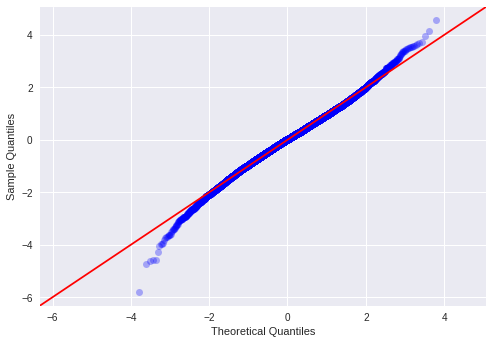

In [104]:
Q_Q_plot(Model_6)

The residuals seem to be normaly distributed.

#### Investigating homoscedsticity

I will perform a hypothesis testing using Goldfeld Quandt we test for heteroscedasticity.

* Null Hypothesis: Error terms are homoscedastic

* Alternative Hypothesis: Error terms are heteroscedastic.

In [105]:
residuals = Model_6.resid
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, interactions_df)
lzip(name, test)

[('F statistic', 1.0246599993802152), ('p-value', 0.16254706854790915)]

p_value greater than 0.05 thus we fail to reject null hypothesis and concluded the errpr terms are homoscedatic

##### Checking multicolinearity

In [106]:
VIF(interactions_df)

/home/elsie/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


grade                     2.863073e+04
lat                       3.189327e+04
sqft_living15             3.446545e+05
house_age                 4.610240e+05
renovation_age            1.083630e+00
liv15                     2.247792e+03
liv                       4.275608e+00
bedrooms_3                2.160868e+05
bedrooms_4                5.159745e+00
bedrooms_5                2.025799e+00
bathrooms_1.0             1.554727e+02
bathrooms_1.25            1.300970e+00
bathrooms_1.5             6.230950e+01
bathrooms_1.75            1.245739e+02
bathrooms_2.0             7.975010e+01
bathrooms_2.25            7.842690e+01
bathrooms_2.5             2.015076e+02
bathrooms_2.75            4.032098e+01
bathrooms_3.0             2.375872e+01
bathrooms_3.25            1.308415e+01
bathrooms_3.5             1.585803e+01
floors_1.5                1.442745e+02
floors_2.0                9.649176e+00
floors_2.5                1.046329e+00
floors_3.0                9.805402e+05
floors_3.5               

Most of the variables have a VIF of less than 5

#### Regression results

Interpreting the interactions model

In [107]:
Model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     709.6
Date:                Sun, 03 Jul 2022   Prob (F-statistic):               0.00
Time:                        23:56:50   Log-Likelihood:                -10557.
No. Observations:               13145   AIC:                         2.121e+04
Df Residuals:                   13099   BIC:                         2.155e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -139.2851      9.706    -14.350      0.000    -158.310    -120.260
grade                      0.7357      0.108      6.836      0.000       0.525       0.947
lat                        2.7762      0.203     13.643      0.000       2.377       3.175
sqft_living15             -0.0012      0.004     -0.313      0.754      -0.009       0.006
house_age                 -0.6793      0.079     -8.585      0.000      -0.834      -0.524
renovation_age         -2.343e-06      0.001     -0.002      0.998      -0.002       0.002
liv15                     -0.5664      0.225     -2.513      0.012      -1.008      -0.125
liv                        0.2439      0.010     24.932      0.000       0.225       0.263
bedrooms_3                11.7755      3.359      3.506      0.000       5.192      18.359
bedrooms_4                -0.1469      0.020     -7.459      0.000      -0.186      -0.108
bedrooms_5                -0.2229      0.028     -8.000      0.000      -0.277      -0.168
bathrooms_1.0              0.0695      0.132      0.526      0.599      -0.189       0.328
bathrooms_1.25            -0.1674      0.276     -0.606      0.544      -0.709       0.374
bathrooms_1.5              0.1182      0.133      0.889      0.374      -0.142       0.379
bathrooms_1.75             0.1944      0.133      1.466      0.143      -0.065       0.454
bathrooms_2.0              0.2231      0.133      1.678      0.093      -0.038       0.484
bathrooms_2.25             0.1785      0.133      1.338      0.181      -0.083       0.440
bathrooms_2.5              0.2204      0.133      1.653      0.098      -0.041       0.482
bathrooms_2.75             0.2940      0.135      2.184      0.029       0.030       0.558
bathrooms_3.0              0.2736      0.136      2.013      0.044       0.007       0.540
bathrooms_3.25             0.3577      0.139      2.578      0.010       0.086       0.630
bathrooms_3.5              0.4150      0.138      3.001      0.003       0.144       0.686
floors_1.5                -0.6302      0.188     -3.359      0.001      -0.998      -0.262
floors_2.0                 0.3059      0.025     12.321      0.000       0.257       0.355
floors_2.5                 0.4383      0.073      6.030      0.000       0.296       0.581
floors_3.0               194.1152     25.848      7.510      0.000     143.449     244.782
floors_3.5                 0.5624      0.244      2.309      0.021       0.085       1.040
waterfront_1.0             0.9476      0.172      5.513      0.000       0.611       1.285
view_1.0                   0.3108      0.042      7.321      0.000       0.228       0.394
view_2.0                   0.2687      0.027     10.053      0.000       0.216       0.321
view_3.0                   0.2798      0.045      6.263      0.000       0.192  

The independent variables with the strongest relationship to price are grade and sqft_living. the coeffients of these variables are:

sqft_living is 0.2439 This means that for every 1% increase in sqft_living square or the footage of the home, there is an 0.24% increase in price of the home.

grade is 0.7357 Since the dependent variable is log transformed and grade is not, we have to exponentiate the feature and subtract 1. (exp(0.3384) – 1) * 100 = 108.6

This means that a unit increase or improvement in grade leads to a price increase of more than 100%.

The model also does not show difference between the  Train RSME and Test RSME,showing that the model is not overfit



#### Conclusions

Adding interaction increased the value of our R_squared

The best predictors for home prices in King County are sqft_living, grade and latitude.

The average house cost in King county is 450000 USD

Although latitude seemed to have high correlation with price,it cannot really define the location on its own.

#### Recomendations

The real estate agency should consider how different combinations of house features may increase sales than focusing on just individual variables

They should consider houses that have a higher grading as this will increase their sales,grading higher than 7

They should also consider houses with larger living spaces as they sell more and have a very linear relationship with price.As the sqft_living increases the price also increases



